C:\Users\decke\AppData\Local\Temp\ipykernel_14080\503151301.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

C:\Users\decke\AppData\Local\Temp\ipykernel_14080\503151301.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

C:\Users\decke\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.


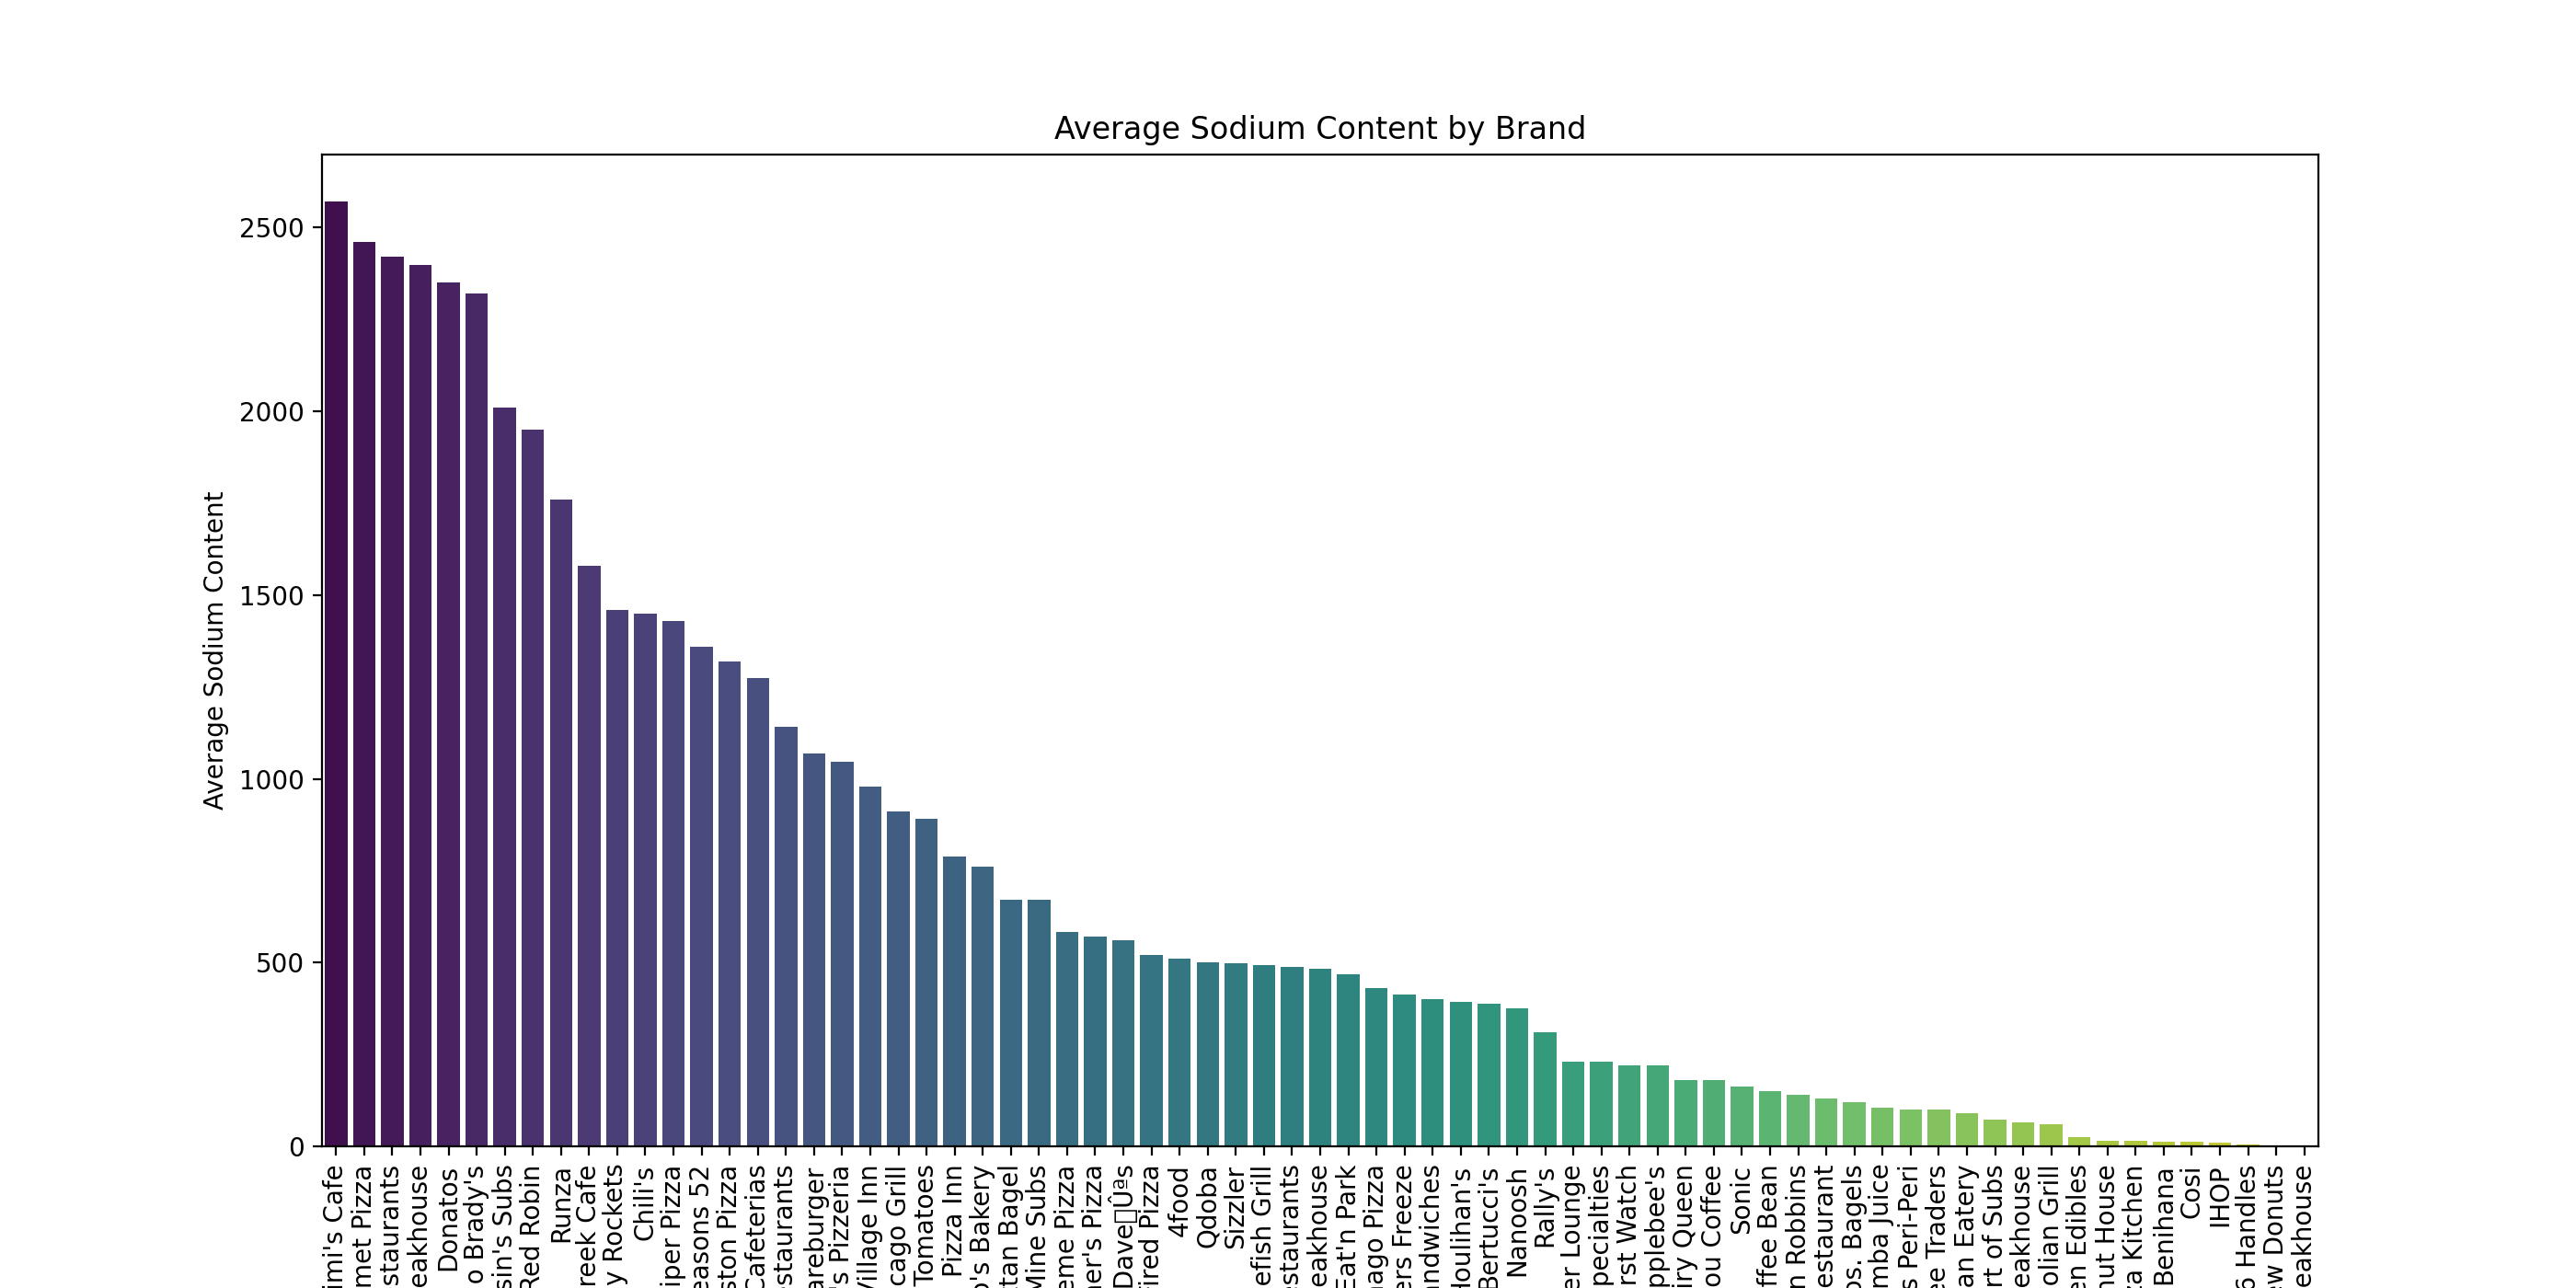

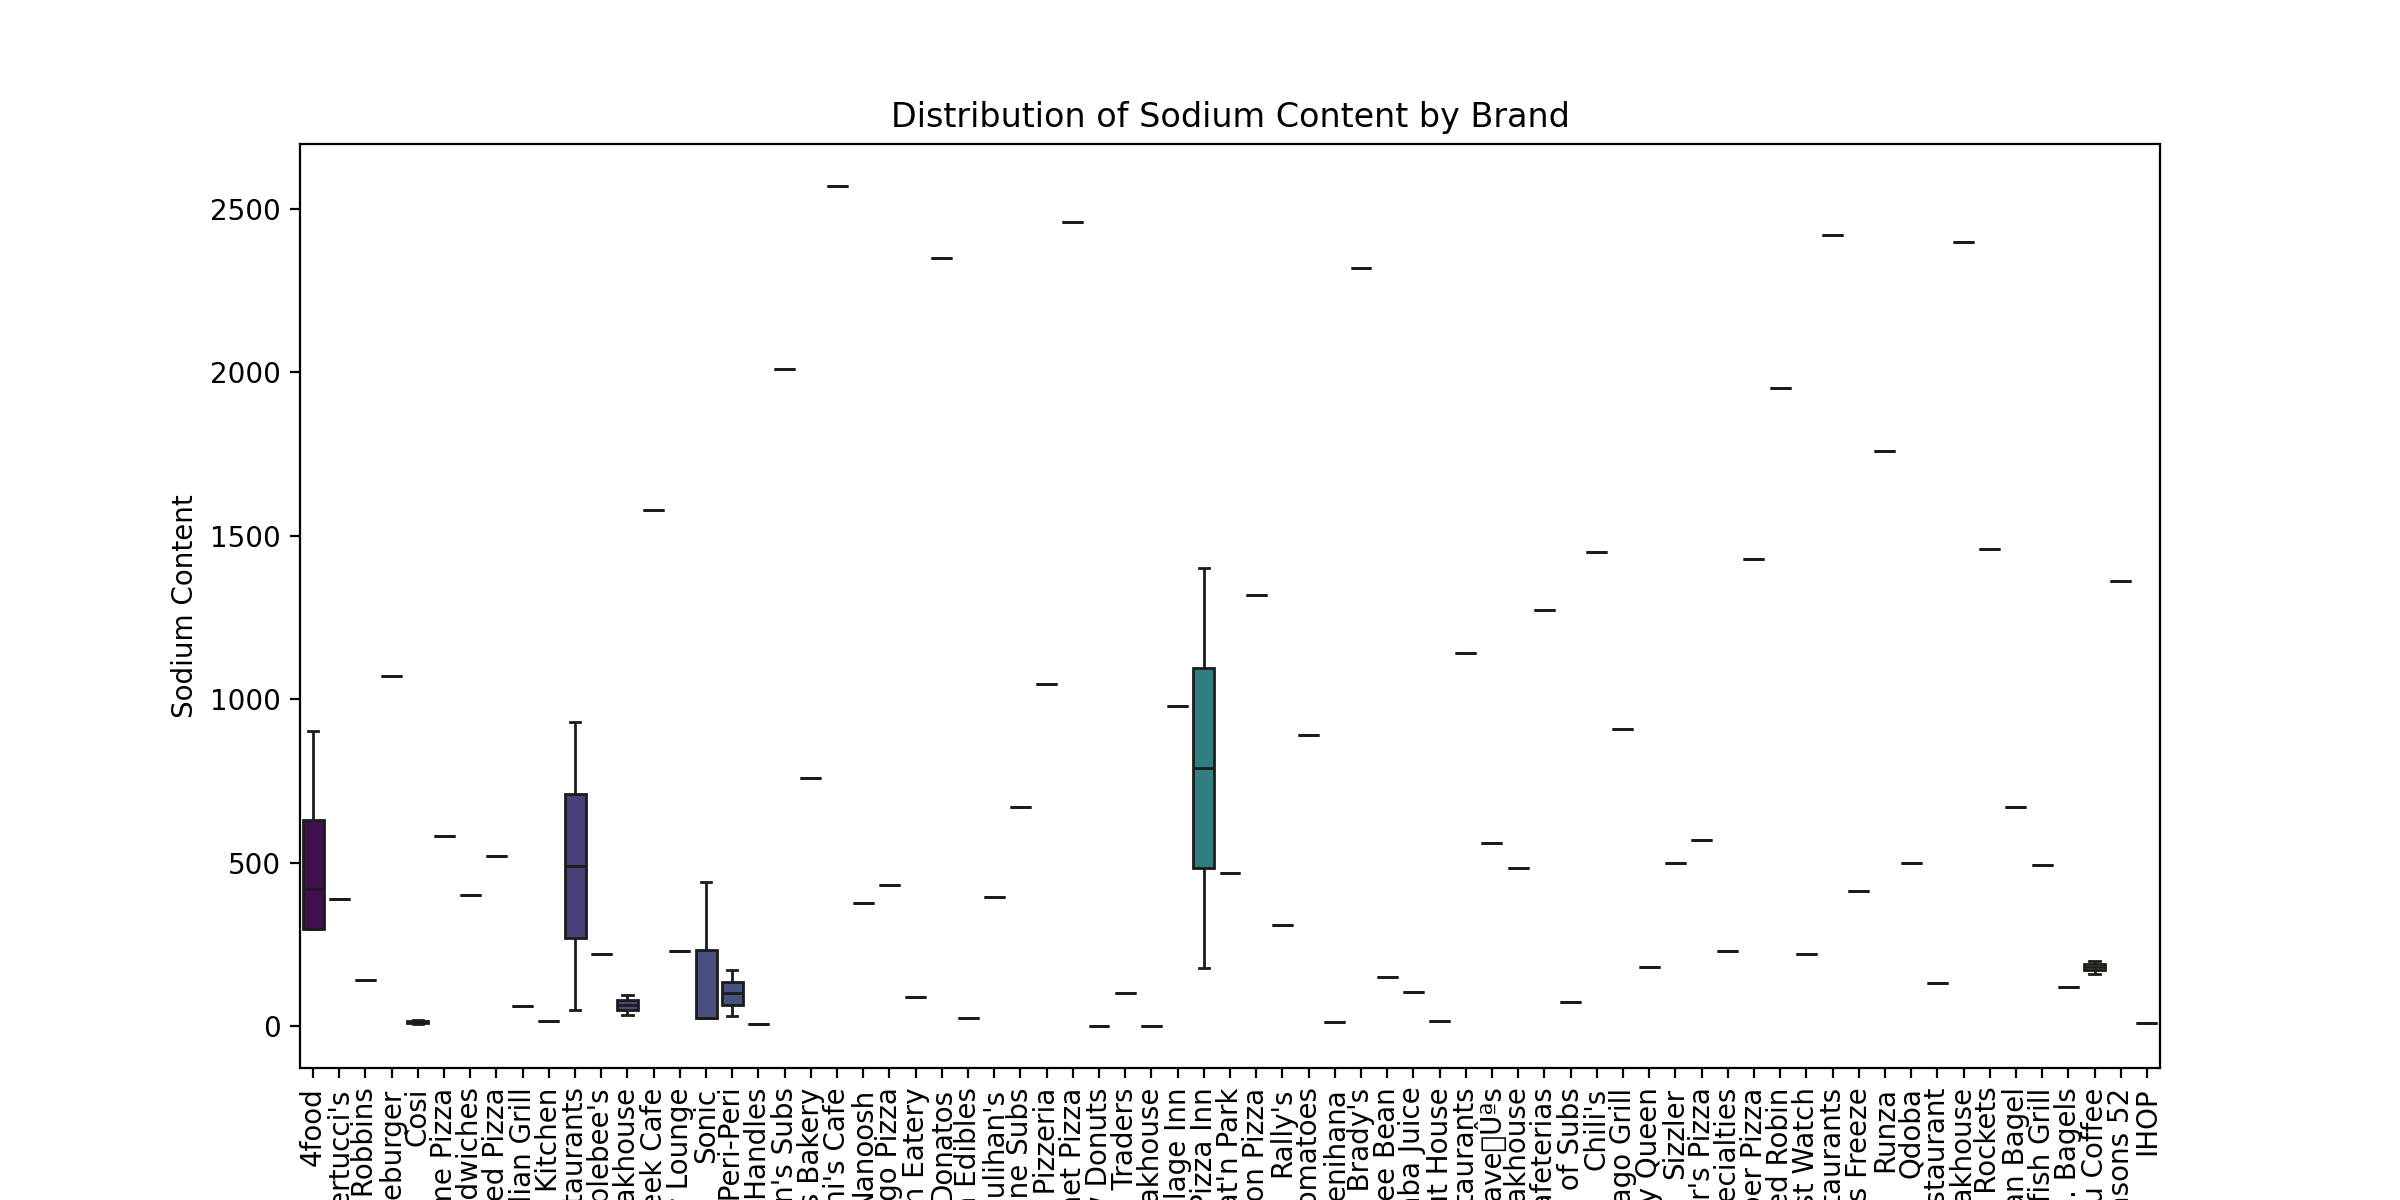

c:\Users\decke\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\_mpl\utils.py:34: UserWarning: Glyph 137 (\x89) missing from current font.


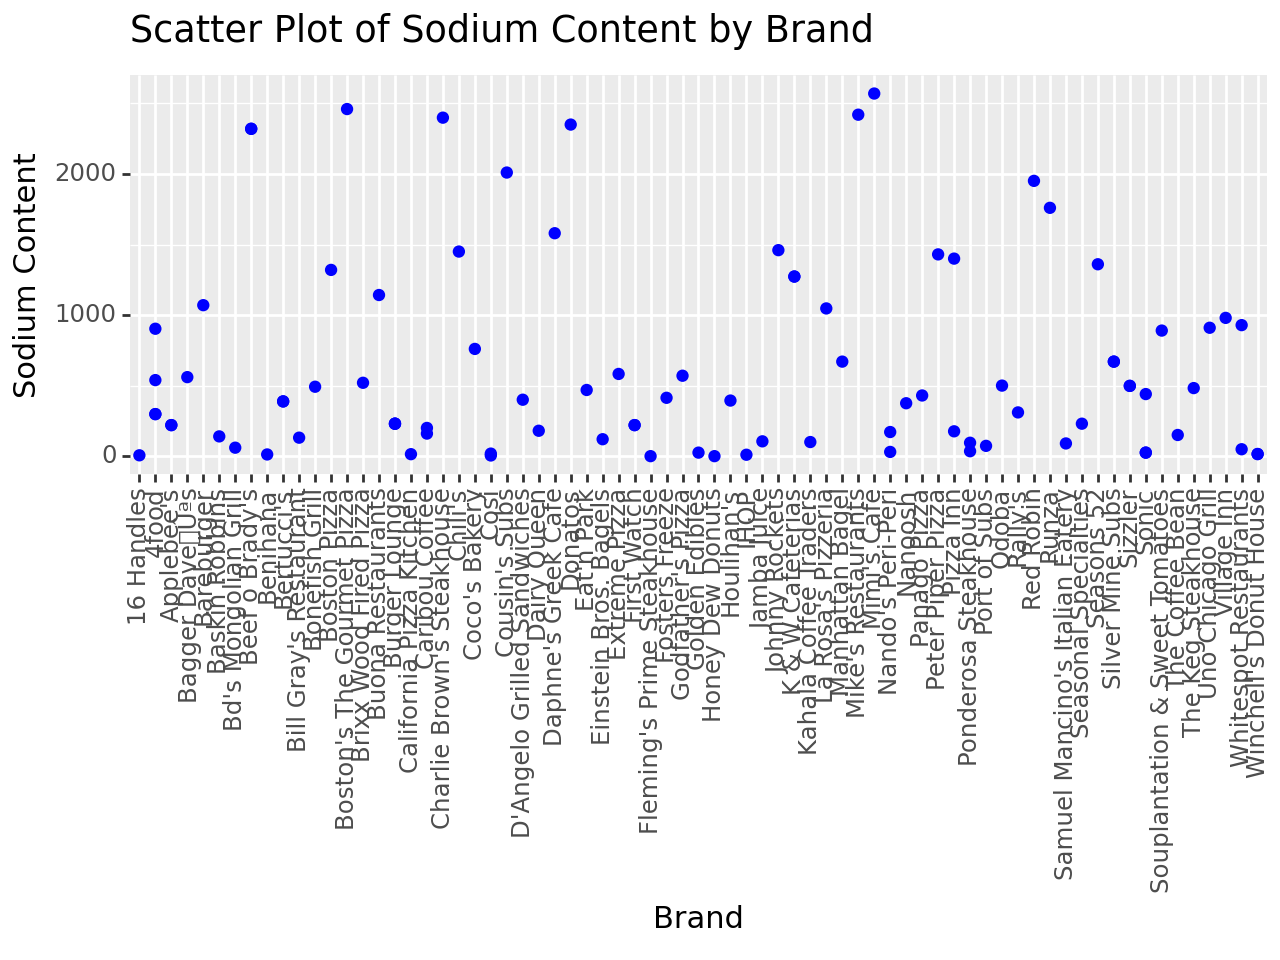

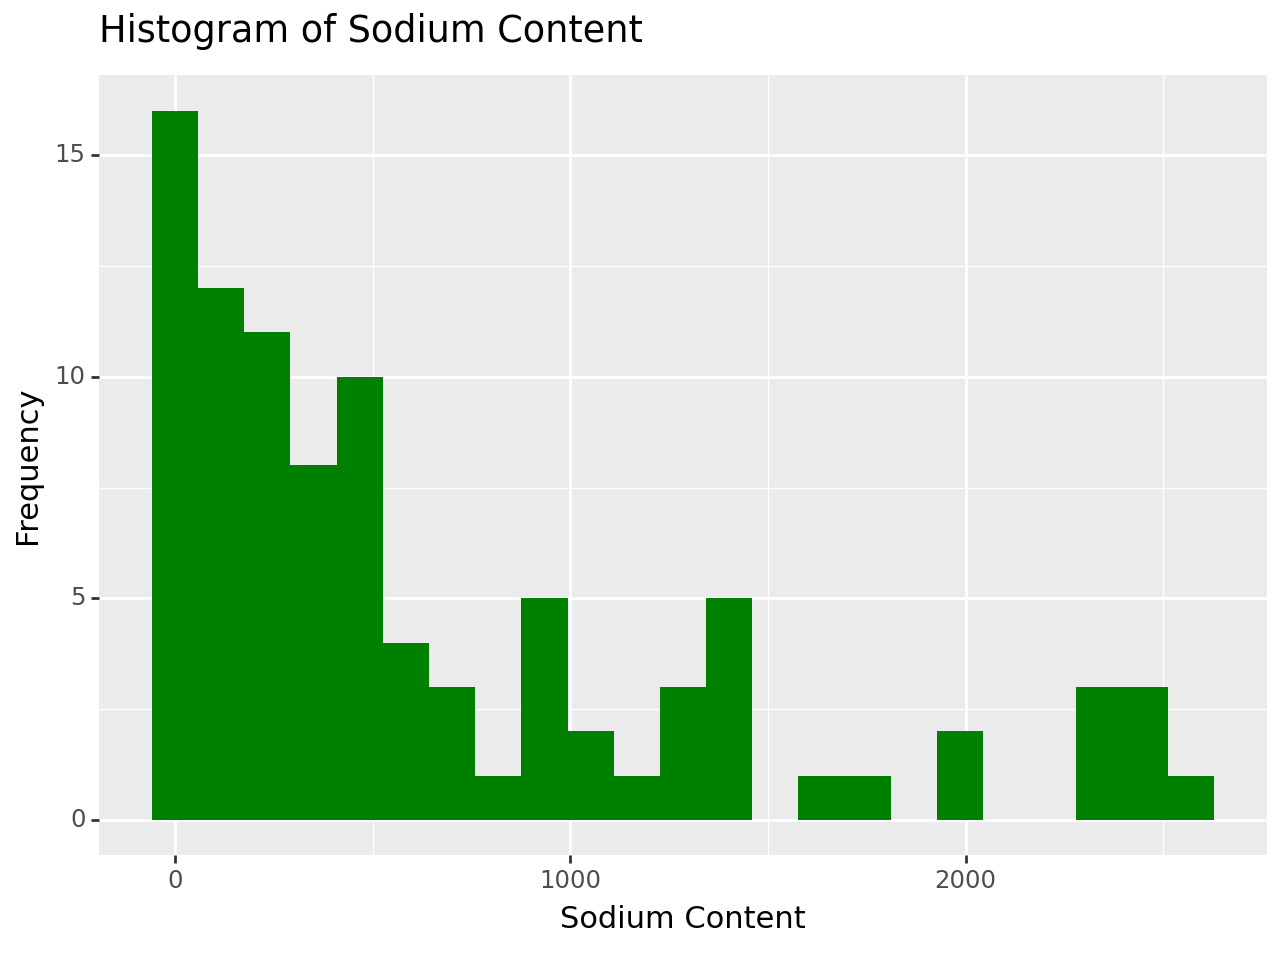


Average Sodium content per brand
Median Sodium Content Across All Brands: 397.0
Average Sodium Content Across All Brands: 648.1194565217392
Brand with the highest average sodium content:
brand_name    Mimi's Cafe
nf_sodium          2570.0
Name: 46, dtype: object


In [15]:
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Read the CSV file and remove missing values
data = pd.read_csv("C:/Users/decke/Downloads/restaurant_sample.csv")
data = data.dropna(subset=["brand_name", "nf_sodium"])

#Handle outliers using z-scores
z_scores = stats.zscore(data["nf_sodium"])
data = data[(z_scores < 3)]

#Group by "Brand_name" and calculate the average nf_sodium
brand_avg_sodium = data.groupby("brand_name")["nf_sodium"].mean().reset_index()

#Identify the brand with the highest average nf_sodium
max_avg_sodium_brand = brand_avg_sodium.loc[brand_avg_sodium["nf_sodium"].idxmax()]
brand_avg_sodium = brand_avg_sodium.sort_values(by="nf_sodium", ascending=False)
#bar chart to compare average nf_sodium content across brands
plt.figure(figsize=(14, 7))
sns.barplot(x="brand_name", y="nf_sodium", data=brand_avg_sodium, palette="viridis")
plt.title("Average Sodium Content by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Sodium Content")
plt.xticks(rotation=90)

#box plot to visualize the distribution of nf_sodium content for each brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="brand_name", y="nf_sodium", data=data, palette="viridis")
plt.title("Distribution of Sodium Content by Brand")
plt.xlabel("Brand")
plt.ylabel("Sodium Content")
plt.xticks(rotation=90)

scatter_plot = (
    ggplot(data, aes(x="brand_name", y="nf_sodium"))
    + geom_point(color="blue")
    + labs(title="Scatter Plot of Sodium Content by Brand", x="Brand", y="Sodium Content")
    + theme(axis_text_x=element_text(rotation=90))
)

#histogram to visualize the distribution of nf_sodium
histogram = (
    ggplot(data, aes(x="nf_sodium"))
    + geom_histogram(fill="green", bins=23)
    + labs(title="Histogram of Sodium Content", x="Sodium Content", y="Frequency")
)

#Show the plots
print(scatter_plot)
print(histogram)
plt.show()

#Print the brand with the highest average nf_sodium
print("Average Sodium content per brand")
average_sodium_across_brands = data["nf_sodium"].mean()
median_sodium_across_brands = data["nf_sodium"].median()

#Print the results about sodium content
print("Median Sodium Content Across All Brands:", median_sodium_across_brands)
print("Average Sodium Content Across All Brands:", average_sodium_across_brands)
print("Brand with the highest average sodium content:")
print(max_avg_sodium_brand)
